In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("data/medical_insurance_scaled.csv", sep=",")
df.head()

,age,children,bmi,sex,smoker,charges,northeast,northwest,southeast,southwest
0,-1.440016,-0.909856,-0.453197,0,1,16884.92400,0.0,0.0,0.0,1.0
1,-1.511283,-0.080117,0.509049,1,0,1725.55230,0.0,0.0,1.0,0.0
2,-0.798610,1.579361,0.382826,1,0,4449.46200,0.0,0.0,1.0,0.0
3,-0.442273,-0.909856,-1.304793,1,0,21984.47061,0.0,1.0,0.0,0.0
4,-0.513541,-0.909856,-0.292550,1,0,3866.85520,0.0,1.0,0.0,0.0


In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("data/medical_insurance_scaled.csv", sep=",")

X = df.drop('charges', axis=1)  # Features
y = df['charges']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 49333501.874673456
R-squared Score: 0.7384235179395939


c:\Users\sacha\anaconda3\envs\SY09\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


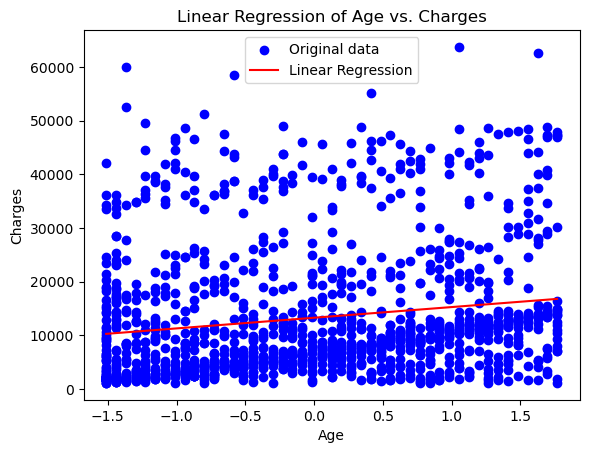

In [5]:
import matplotlib.pyplot as plt

# Choose two features to visualize: age and charges
X_plot = df[['age']]
y_plot = df['charges']

# Create a linear regression model using the chosen features
model_plot = LinearRegression()
model_plot.fit(X_plot, y_plot)

# Create a scatter plot of the chosen features
plt.scatter(X_plot, y_plot, color='blue', label='Original data')

# Create a range of values for the x-axis
x_range = np.linspace(X_plot.min(), X_plot.max(), 100)

# Predict the y values for the x_range using the linear regression model
y_range = model_plot.predict(x_range.reshape(-1, 1))

# Plot the linear regression line
plt.plot(x_range, y_range, color='red', label='Linear Regression')

# Add title and labels to the plot
plt.title('Linear Regression of Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

# Show the legend
plt.legend()

# Show the plot
plt.show()


<Figure size 1200x600 with 0 Axes>

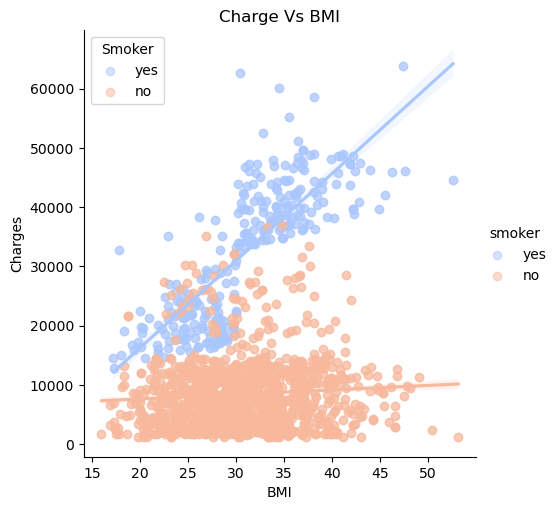

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/medical_insurance.csv", sep=",")

plt.figure(figsize=(12, 6))
sns.lmplot(x='bmi', y='charges', data=df, hue='smoker', palette='coolwarm', fit_reg=True, scatter_kws={'alpha': 0.5})
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Charge Vs BMI')
plt.legend(title='Smoker')
plt.show()

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df = pd.read_csv("data/medical_insurance.csv", sep=",")
df = df.drop_duplicates()

le_smoker = LabelEncoder()
df["smoker"] = le_smoker.fit_transform(df["smoker"])

le_sex = LabelEncoder()
df["sex"] = le_sex.fit_transform(df["sex"])

oh_region = OneHotEncoder()
encoded_region = oh_region.fit_transform(df[["region"]])
encoded_region = pd.DataFrame(encoded_region.toarray(), columns=["northeast", "northwest", "southeast", "southwest"])
df.drop(columns=["region"], inplace=True)
df = pd.merge(df, encoded_region, left_index=True, right_index=True)

scaler = StandardScaler()
# On ne garde que age, children, bmi
df_quant = df[["age", "bmi"]]
df_non_quant = df.drop(columns=["age", "bmi"])
scaled_data = scaler.fit_transform(df_quant)


scaled_data = pd.DataFrame(scaled_data, columns=["age", "bmi"])
scaled_data = pd.merge(scaled_data, df_non_quant, left_index=True, right_index=True)
scaled_data.head()

,age,bmi,sex,children,smoker,charges,northeast,northwest,southeast,southwest
0,-1.440016,-0.453197,0,0,1,16884.92400,0.0,0.0,0.0,1.0
1,-1.511283,0.509049,1,1,0,1725.55230,0.0,0.0,1.0,0.0
2,-0.798610,0.382826,1,3,0,4449.46200,0.0,0.0,1.0,0.0
3,-0.442273,-1.304793,1,0,0,21984.47061,0.0,1.0,0.0,0.0
4,-0.513541,-0.292550,1,0,0,3866.85520,0.0,1.0,0.0,0.0


In [23]:
df_smoker = scaled_data[scaled_data['smoker'] == 1]
df_smoker = df_smoker.drop('smoker', axis=1)

df_non_smoker = scaled_data[scaled_data['smoker'] == 0]
df_non_smoker = df_non_smoker.drop('smoker', axis=1)


In [24]:
# Linear Regression for Smokers
X_smoker = df_smoker.drop('charges', axis=1)
y_smoker = df_smoker['charges']

X_train_smoker, X_test_smoker, y_train_smoker, y_test_smoker = train_test_split(X_smoker, y_smoker, test_size=0.2)

model_smoker = LinearRegression()
model_smoker.fit(X_train_smoker, y_train_smoker)

y_pred_smoker = model_smoker.predict(X_test_smoker)

mse_smoker = mean_squared_error(y_test_smoker, y_pred_smoker)
r2_smoker = r2_score(y_test_smoker, y_pred_smoker)

print("Mean Squared Error for Smokers:", mse_smoker)
print("R-squared Score for Smokers:", r2_smoker)

Mean Squared Error for Smokers: 151135666.2470422
R-squared Score for Smokers: 0.08293639887877058


In [25]:
# Linear Regression for Non-Smokers
X_non_smoker = df_non_smoker.drop('charges', axis=1)
y_non_smoker = df_non_smoker['charges']

X_train_non_smoker, X_test_non_smoker, y_train_non_smoker, y_test_non_smoker = train_test_split(X_non_smoker, y_non_smoker, test_size=0.2)

model_non_smoker = LinearRegression()
model_non_smoker.fit(X_train_non_smoker, y_train_non_smoker)

y_pred_non_smoker = model_non_smoker.predict(X_test_non_smoker)

mse_non_smoker = mean_squared_error(y_test_non_smoker, y_pred_non_smoker)
r2_non_smoker = r2_score(y_test_non_smoker, y_pred_non_smoker)

print("Mean Squared Error for Non-Smokers:", mse_non_smoker)
print("R-squared Score for Non-Smokers:", r2_non_smoker)

Mean Squared Error for Non-Smokers: 35237543.656809404
R-squared Score for Non-Smokers: 0.0657016927223113


In [37]:
# On fait un input pour tester les modèles

age = int(input("Entrer votre âge: "))
while age < 0 or age > 120:
    age = int(input("Saisie incorrecte. Entrer votre âge: "))

bmi = float(input("Entrer votre BMI: "))
while bmi < 0 or bmi > 100:
    bmi = float(input("Saisie incorrecte. Entrer votre BMI: "))

scaled_input = scaler.transform([[age, bmi]])
scaled_input = pd.DataFrame(scaled_input, columns=["age", "bmi"])

children = int(input("Entrer le nombre d'enfants à charge: "))
while children < 0:
    children = int(input("Saisie incorrecte. Entrer le nombre d'enfants à charge: "))

smoker = int(input("Êtes-vous fumeur? (1 pour oui, 0 pour non): ") == 1)
while smoker not in [0, 1]:
    smoker = int(input("Saisie incorrecte. Êtes-vous fumeur? (1 pour oui, 0 pour non): ") == 1)

region = input("Entrer votre région (ne, nw, se, sw): ")
while region not in ["ne", "nw", "se", "sw"]:
    region = input("Saisie incorrecte. Entrer votre région (ne, nw, se, sw): ")
    

sex = int(input("Êtes-vous un homme? (1 pour oui, 0 pour non): ") == 1)
while sex not in [0, 1]:
    sex = int(input("Saisie incorrecte. Êtes-vous un homme? (1 pour oui, 0 pour non): ") == 1)

input_data = pd.DataFrame([[
        scaled_input["age"][0], 
        scaled_input["bmi"][0],
        sex, 
        children, 
        0, 0, 0, 0
    ]], columns=["age", "bmi", "sex", "children", "northeast", "northwest", "southeast", "southwest"])

if region == "ne":
    input_data["northeast"] = 1
elif region == "nw":
    input_data["northwest"] = 1
elif region == "se":
    input_data["southeast"] = 1
else:
    input_data["southwest"] = 1
    
    
# --- Prédiction de la prime d'assurance ---
if smoker:
    charges = model_smoker.predict(input_data)
    print(f"Votre prime d'assurance en tant que fumeur est de: {charges[0]:.2f} $")
else:
    charges = model_non_smoker.predict(input_data)
    print(f"Votre prime d'assurance en tant que non-fumeur est de: {charges[0]:.2f} $")

c:\Users\sacha\anaconda3\envs\SY09\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Votre prime d'assurance en tant que non-fumeur est de: 13246.08 $
